In [29]:
using LinearAlgebra, Plots, Statistics

In [30]:
N = 100
a = 1
b = 2
c = 1.5
d = 2.5
ε=5*3.1415926535/180
θA = range(π-ε,π+ε,length=N)
    Ab = 2b*(a*cos.(θA).-d)
    Bb = 2b*a*sin.(θA)
    Cb = c^2 .-a^2 .-b^2 .-d^2 .+2a*d*cos.(θA)
θB = atan.(Bb,Ab)-acos.(Cb./sqrt.(Ab.^2+Bb.^2));
ptA = zeros(N,2)
ptB = ptA + a*[cos.(θA) sin.(θA)]
ptD = [d*ones(N) zeros(N)]
ptC = ptB + b*[cos.(θB) sin.(θB)]

100×2 Matrix{Float64}:
 1.00372  0.105581
 1.00357  0.103452
 1.00343  0.101323
 1.00328  0.0991937
 1.00314  0.097064
 1.00301  0.094934
 1.00287  0.0928039
 1.00274  0.0906735
 1.00262  0.0885429
 1.00249  0.0864121
 1.00237  0.0842811
 1.00225  0.0821499
 1.00214  0.0800185
 ⋮        
 1.00019  0.0240261
 1.0002   0.0246504
 1.00021  0.0252749
 1.00022  0.0258993
 1.00023  0.0265238
 1.00025  0.0271483
 1.00026  0.0277728
 1.00027  0.0283973
 1.00028  0.0290219
 1.00029  0.0296465
 1.00031  0.0302712
 1.00032  0.0308958

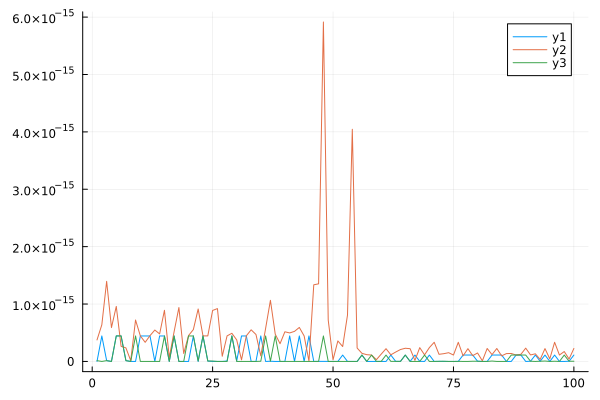

In [31]:
Λ = [0 1 0;
     0 0 1;
     1 0 0]
E = [0 -1;1 0]
x= [1;0]
y= [0;1]
ξA = [1;0;0]
function ζ(r,s)
return [s;s'*E*r]
end
E_inv=zeros(N)
E_lu=zeros(N)
E_qr=zeros(N)
E_svd=zeros(N)
E_K=zeros(N)
for i in 1:N
    ζ1=ζ(ptD[i,:]-ptA[i,:],x)
    ζ2=ζ(ptD[i,:]-ptA[i,:],y)
    rBC = (ptC[i,:]-ptB[i,:])
    sBC= rBC/norm(rBC)
    ζ3=ζ(ptB[i,:]-ptA[i,:],sBC)
    A = [ζ1 ζ2 ζ3]'*Λ
    B = [0;0;ζ3'*Λ*ξA]
    K = (ζ1×ζ2)*ζ3'/((ζ1×ζ2)'*ζ3)
    B_inv = A*inv(A)*B
    e_inv = B_inv-B
    E_inv[i]=norm(e_inv[2:3])
    U, S, V = svd(A);
    C = (U'*B)./S;
    B_svd = A*(V * C)
    e_svd = B_svd-B
    E_svd[i]=norm(e_svd[2:3])
    e_K = A*(Λ'*K*Λ*ξA)-B
    E_K[i]=norm(e_K[2:3])
end
plot(E_inv)
plot!(E_svd)
plot!(E_K)

In [32]:
median(E_inv)/median(E_inv)

1.0

In [33]:
median(E_svd)/median(E_inv) 

274.538803228554

In [34]:
median(E_K)/median(E_inv) 

0.1875